#  Business Case: Yulu - Hypothesis Testing

### Business Problem

* Yulu is India’s leading micro- mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

* Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

* Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### DataLink: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

#### Yulu Dataset contains following aattribute:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [38]:
# loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#loading the data frame
yulu = pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [5]:
# checking the loaded dataframe with first few rows
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
#checking the loaded dataframe with last few rows
yulu.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
# checking the columns present in the dataframe
yulu.columns.to_list()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [9]:
# checking the shape of the dataframe 
yulu.shape

(10886, 12)

In [10]:
# total no. of volume(elements)
yulu.size 

130632

In [11]:
#checking datatypes
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [12]:
#number of unique values in our data
yulu.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [14]:
#This method prints information about the DataFrame including the index dtype and columns, non-null values and memory usage
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
yulu.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


### Analysing basic metrics

##### datetime
- There is total 10886 unique date is present in the given dataset.
##### season
- There is four time of season present in the dataset. 1: spring, 2: summer, 3: fall, 4: winter
##### holiday
- If the day is a holiday then 0 and if it is not a holiday then it is 1 in the dataset and maximum are not holiday.
##### workingday
-  if day is neither weekend nor holiday is 1, otherwise is 0. Maximum day are working day in the given data science.
##### weather 
- 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog and maximum is type 4
##### temp 
- Average temprature of the givn dataset is 20.23 degree celceius. and most occured is 41 degree.
##### temp 
- Average temprature of the givn dataset is 23.65 degree celceius. and most occured is 45.45 degree.
##### humidity 
- Average humudity of the givn dataset is 61.88. and most occured is 100.00.
##### windspeed 
- Average windspeed of the givn dataset is 12.80. and most occured is 56.99.
##### Casual
- Repesents the casual user on each date
##### registered
- It gives the total count of users.
##### count
- count of total rental bikes including both casual and registered


### Describing Statistical summery of Independent Numerical Features

##### Categorising Temperature And Humidity Levels and Windspeed column data

,count,mean,std,min,25%,50%,75%,max
atemp,10886.0,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455


In [46]:
def get_temp(temp):
 if temp <= 12 : return "very low"
 elif temp > 12 and temp < 24 : return "low"
 elif temp >= 24 and temp < 35 : return "moderate"
 elif temp >= 35 : return "high"

In [47]:
yulu["temperature"]=pd.Series(map(get_temp,yulu["atemp"]))

### Changing Of the column if required

#### Datatype of following attributes needs to changed to proper data type

- datetime - to datetime
- season - to categorical
- holiday - to categorical
- workingday - to categorical
- weather - to categorical

In [8]:
yulu['datetime'] = pd.to_datetime(yulu['datetime'])

col= ['season', 'holiday', 'workingday', 'weather']
for i in col:
    yulu[i] = yulu[i].astype('object')


In [9]:
yulu.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Missing value Detection 

In [10]:
# detecting missing values in the dataset
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Observation**
- There is no missing values in the given yulu dataset.

### Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [12]:
yulu.describe(include="all")

/var/folders/57/m5hgcgf93mq4vlk6xhlrjy7r0000gn/T/ipykernel_14388/966198697.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  yulu.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


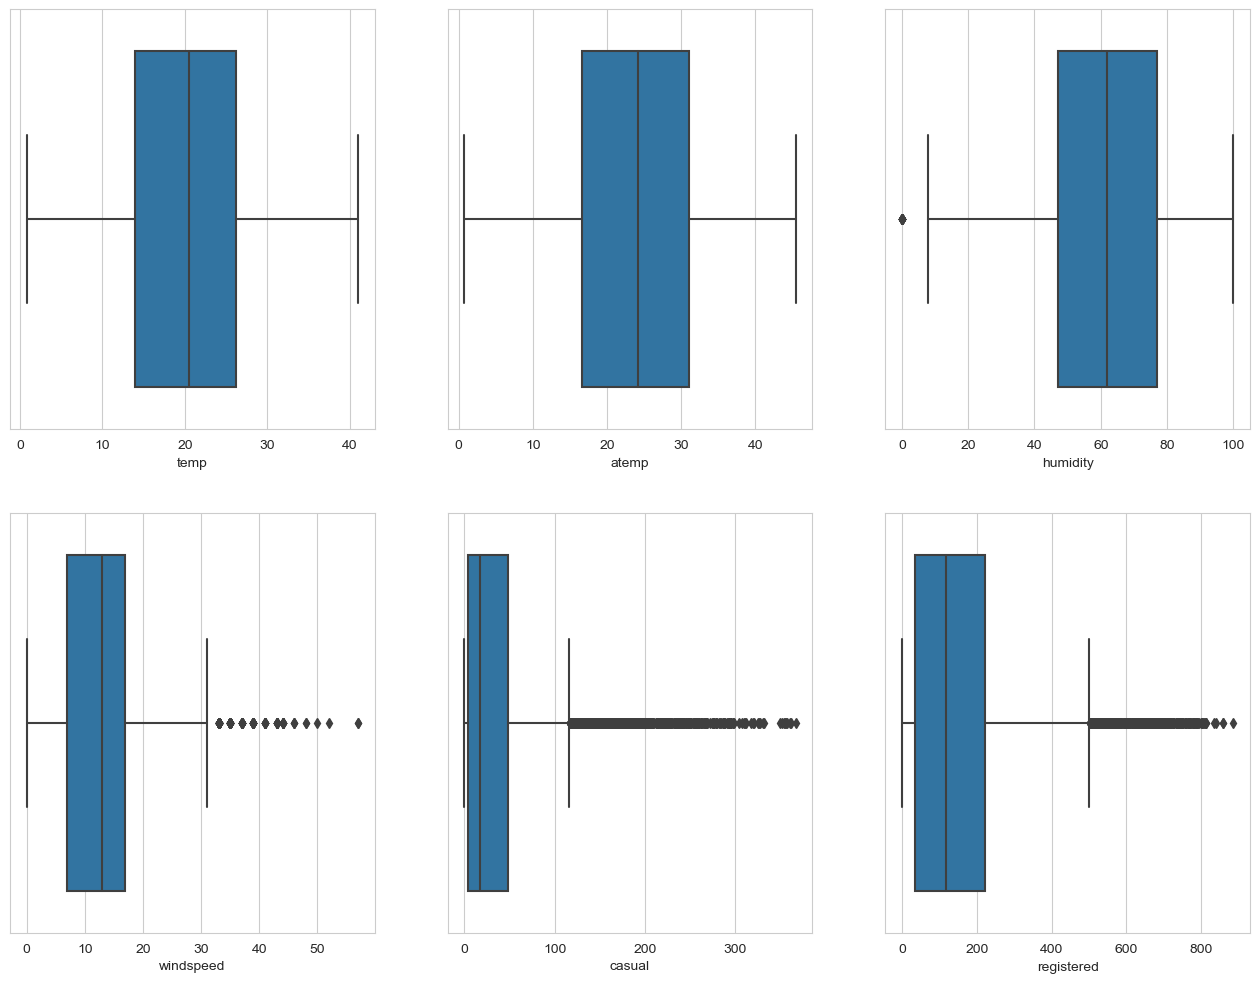

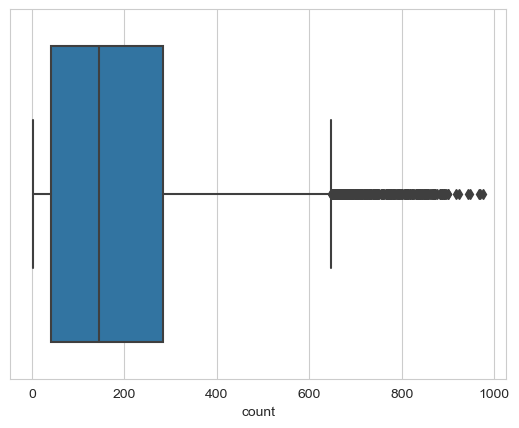

In [27]:
# plotting box plots to detect outliers in the data
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=yulu[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=yulu[num_cols[-1]]) 
plt.show()

**Observation**
- 'casual' and 'registered' attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.
- Looks like humidity, casual, registered and count have outliers in the data.

### Univariate Analysis

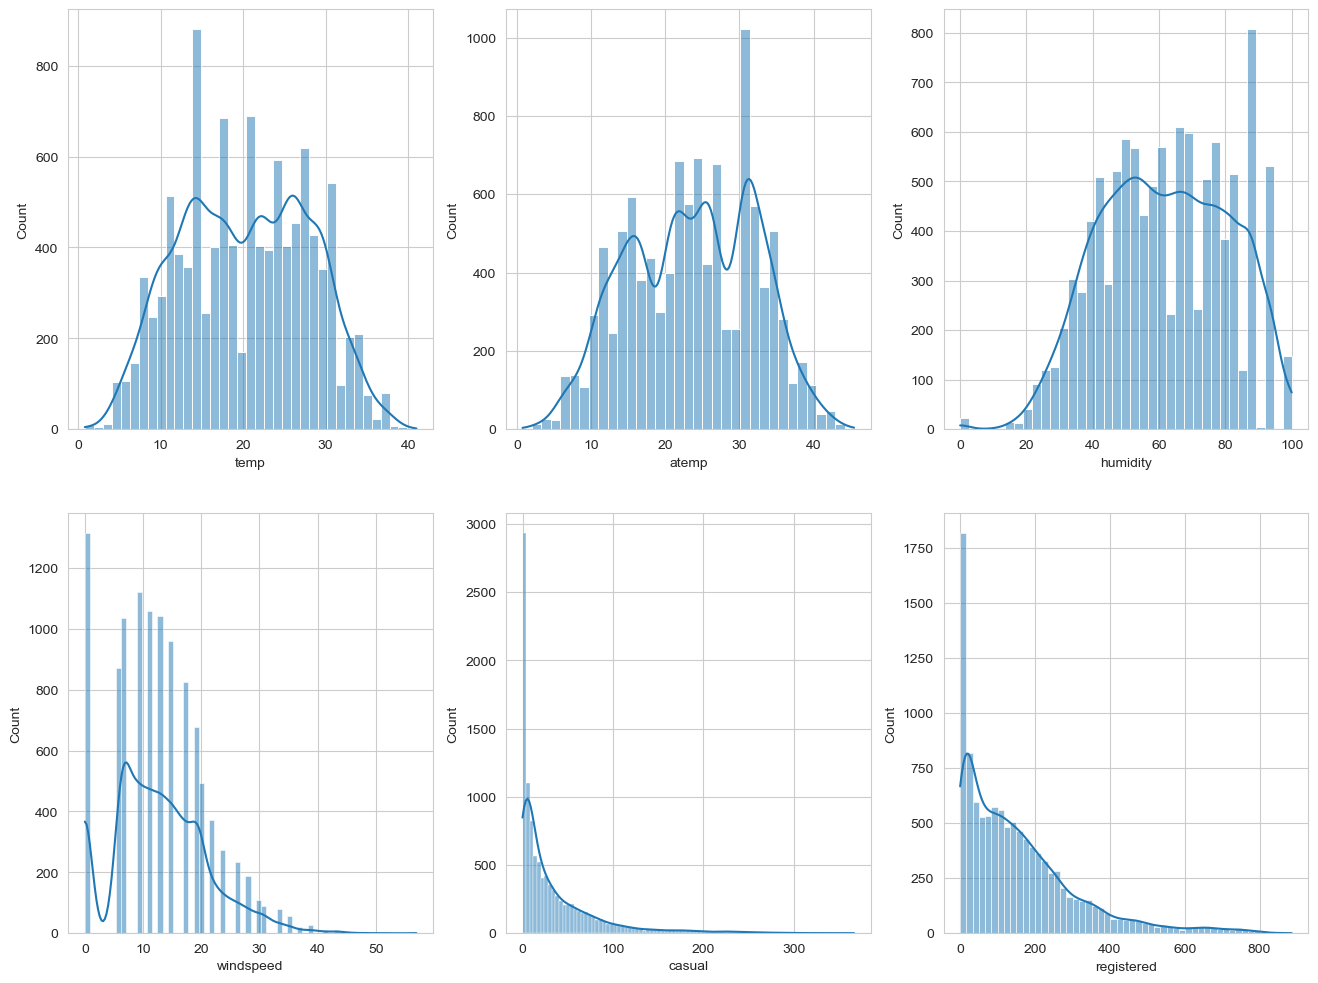

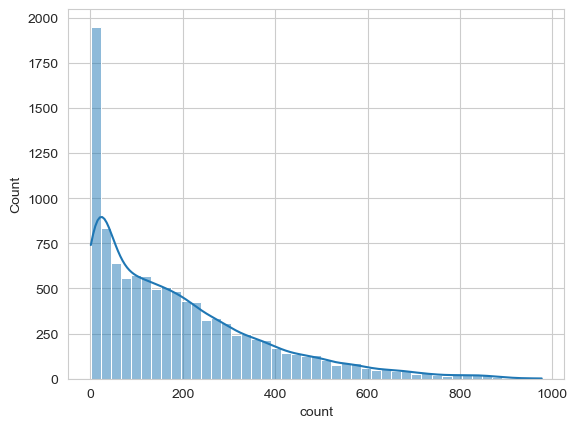

In [20]:
# understanding the distribution for numerical variables
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(yulu[cols[index]], ax=axis[row, col], kde=True,palette='PuBuGn')
        index += 1
        
plt.show()
sns.histplot(yulu[cols[-1]], kde=True) 
plt.show()

**Observation**
- casual, registered and count somewhat looks like Log Normal Distrinution
- temp, atemp and humidity looks like they follows the Normal Distribution
- windspeed follows the binomial distribution

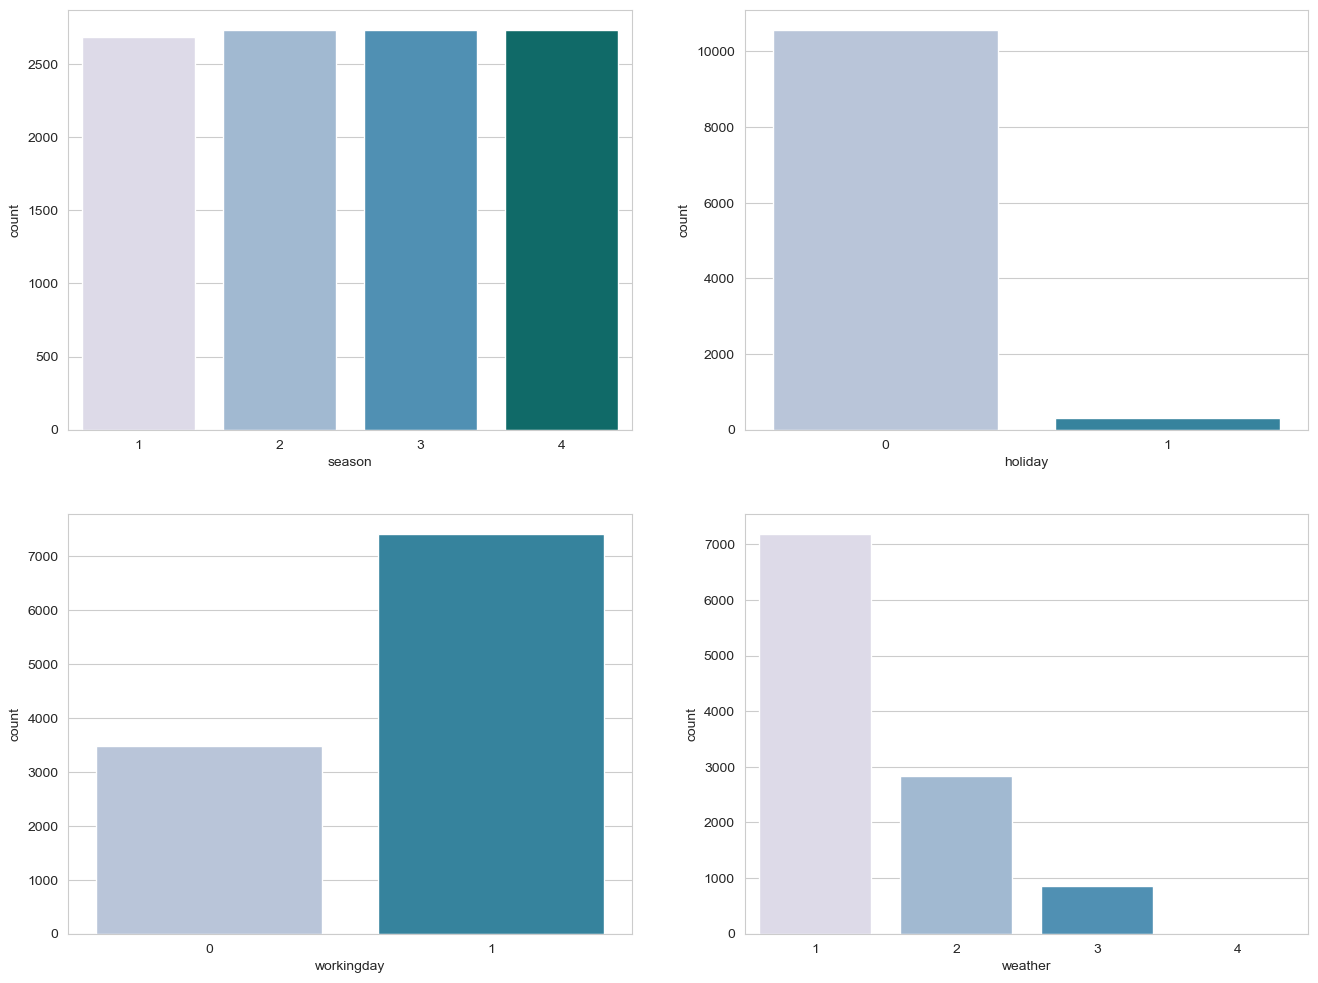

In [29]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
cat_cols= ['season', 'holiday', 'workingday', 'weather']
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=yulu, x=cat_cols[index], ax=axis[row, col],palette='PuBuGn')
        index += 1
        
plt.show()

**observation**
- Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

### Bivarate Analysis

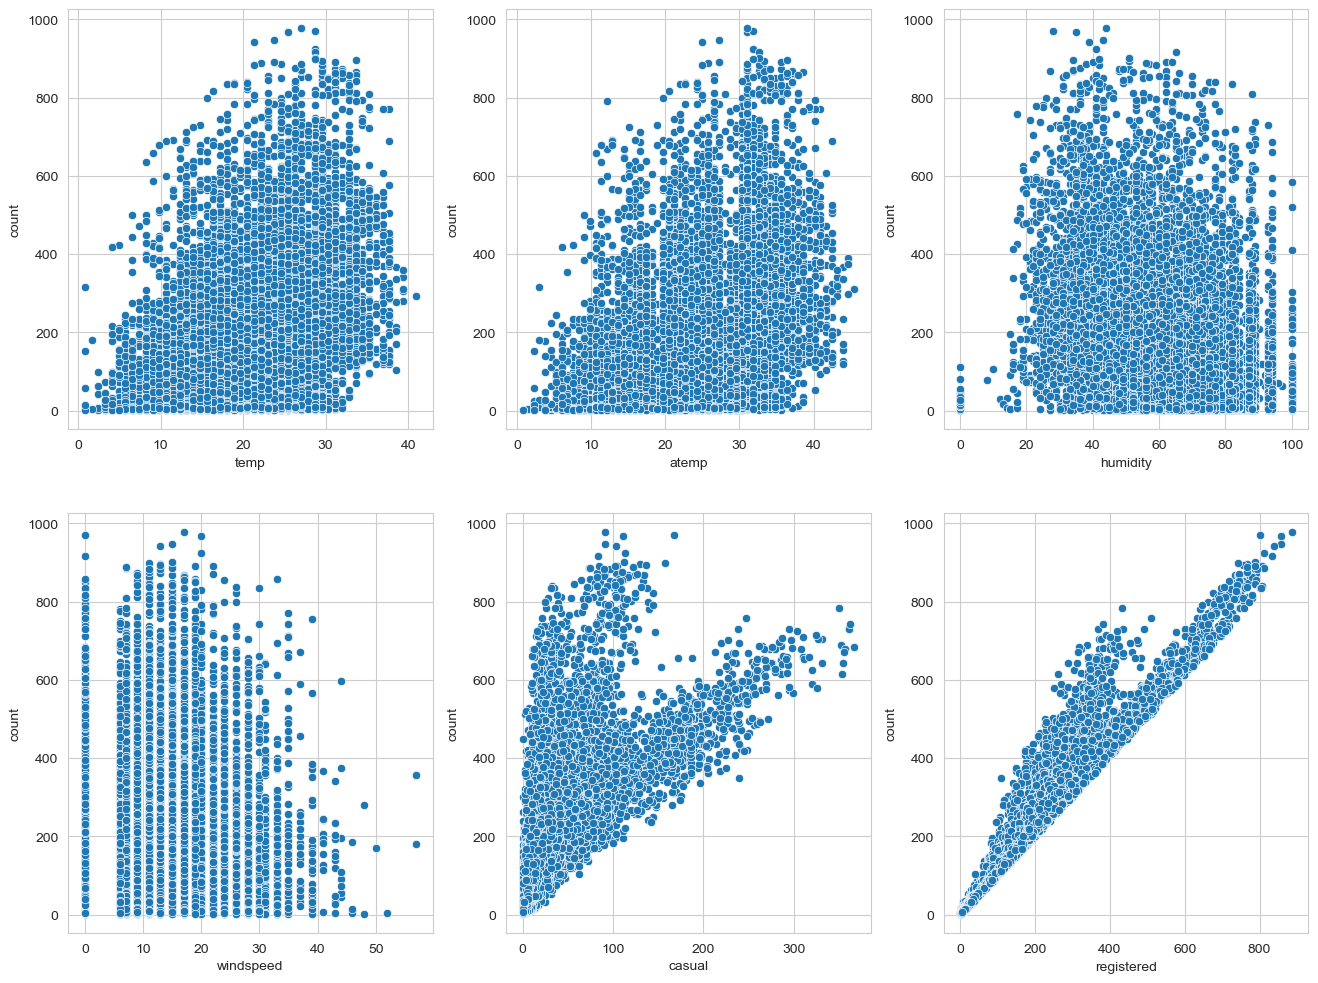

In [31]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=yulu, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

**Observation**
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

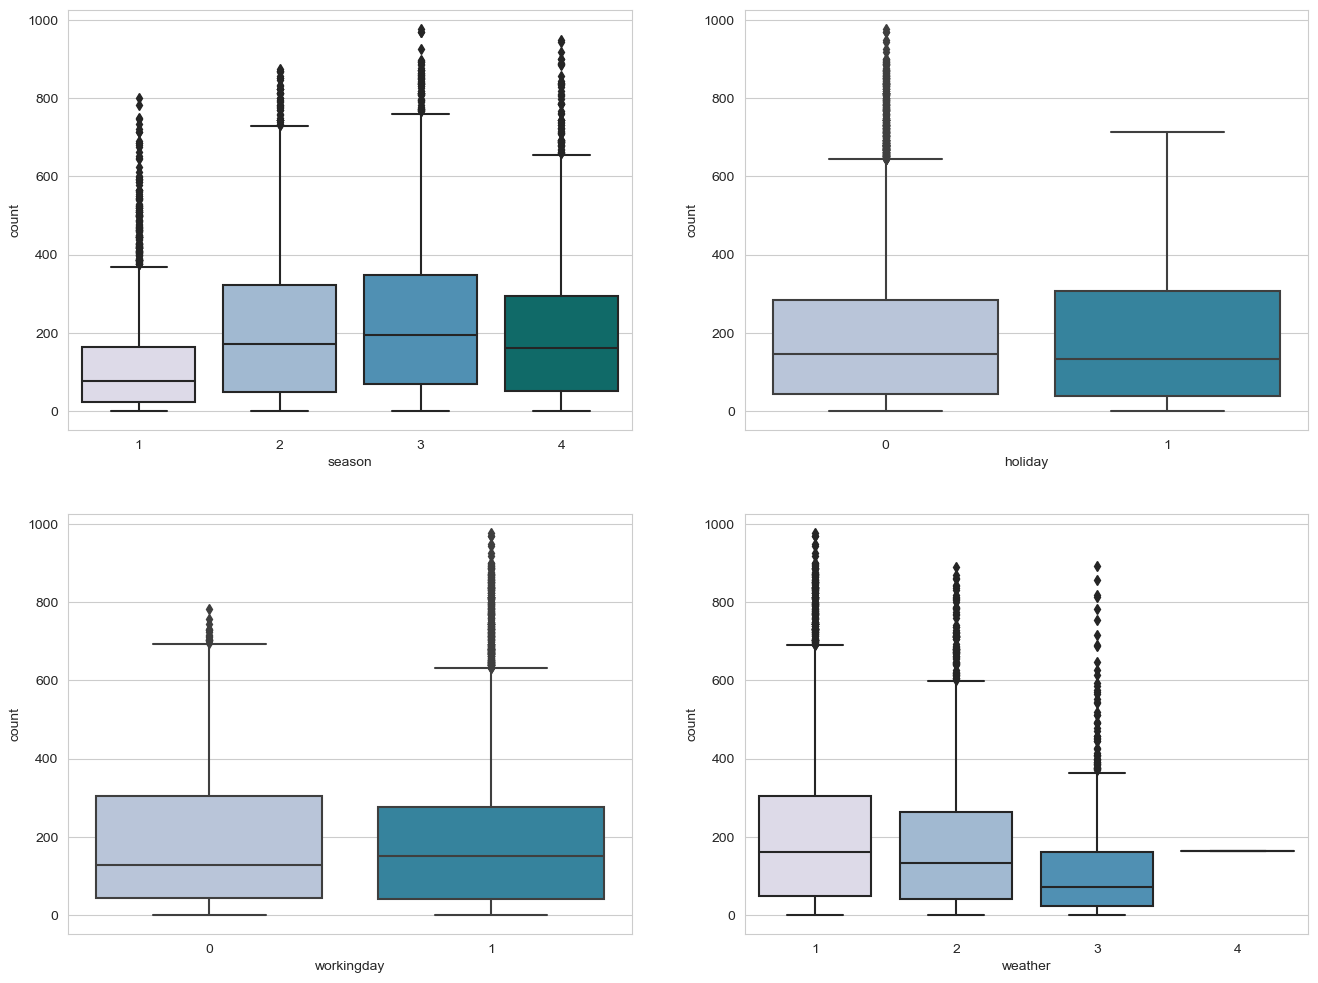

In [34]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=yulu, x=cat_cols[index], y='count', ax=axis[row, col],palette='PuBuGn')
        index += 1
        
plt.show()

**observation**
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

/var/folders/57/m5hgcgf93mq4vlk6xhlrjy7r0000gn/T/ipykernel_14388/2383646307.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yulu.corr(), annot = True, cmap="YlGnBu")


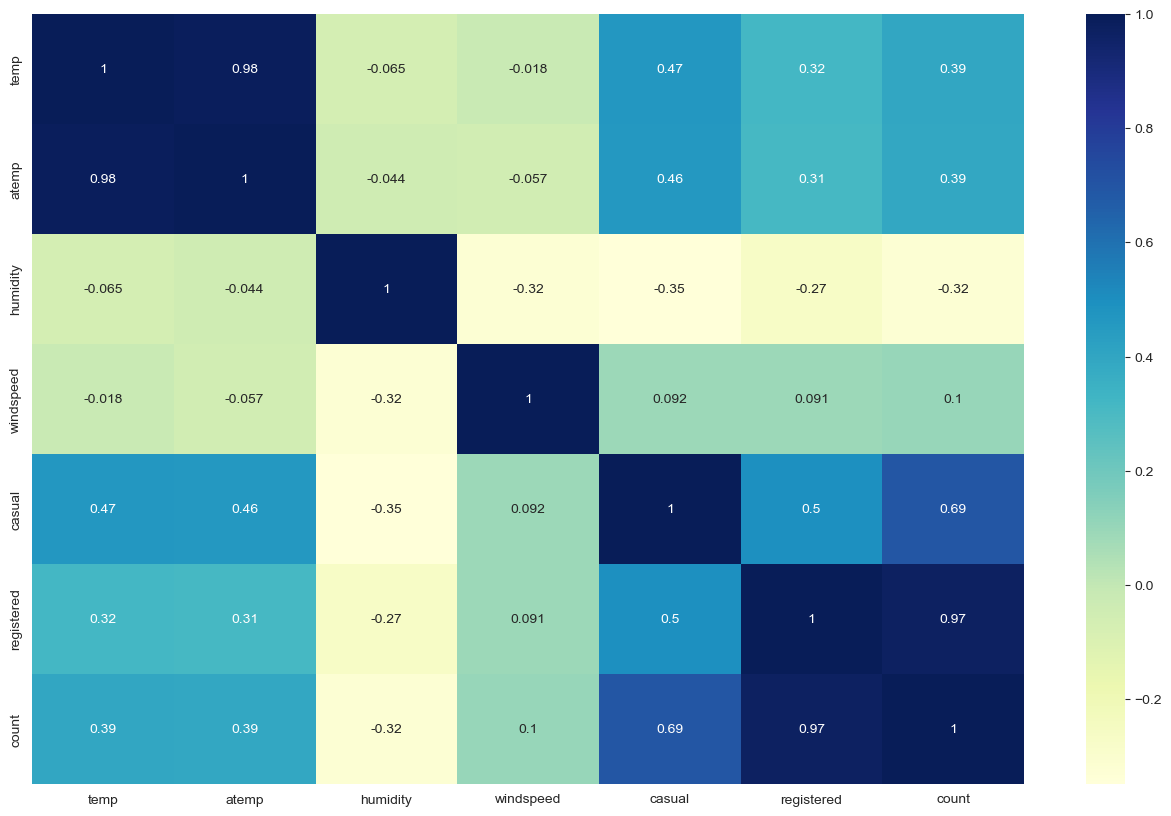

In [25]:
plt.figure(figsize = (16, 10))
sns.heatmap(yulu.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observation**
- This shows the co-relation between all the attributes with each other.
- Temperature and Number of Cycles Rented for all customers : 0.39
- Correlation between Temperature and Number of Cycles Rented for casual subscribers : 0.46
- Correlation between Temperature and Number of Cycles Rented for registered subscribers : 0.31
- Correlation between Temperature and Number of Cycles Rented for registered subscribers : 0.31
- Humidity has a negative correlation with the number of cycles rented which is -0.3

### Hypothesis Testing - 1

- Null Hypothesis (H0): Weather is independent of the season

- Alternate Hypothesis (H1): Weather is not independent of the season

- Significance level (alpha): 0.05

- We will use chi-square test to test hypyothesis defined above.

In [36]:
data_table = pd.crosstab(yulu['season'], yulu['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [39]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [40]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


### Hypothesis Testing - 2

- Null Hypothesis: Working day has no effect on the number of cycles being rented.

- Alternate Hypothesis: Working day has effect on the number of cycles being rented.

- Significance level (alpha): 0.05

- We will use the 2-Sample T-Test to test the hypothess defined above

In [41]:
data_group1 = yulu[yulu['workingday']==0]['count'].values
data_group2 = yulu[yulu['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

- Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

- Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [42]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

- Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

### Hypothesis Testing - 3

- Null Hypothesis: Number of cycles rented is similar in different weather and season.

- Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

- Significance level (alpha): 0.05

- Here, we will use the ANOVA to test the hypothess defined above

In [44]:
# defining the data groups for the ANOVA

gp1 = yulu[yulu['weather']==1]['count'].values
gp2 = yulu[yulu['weather']==2]['count'].values
gp3 = yulu[yulu['weather']==3]['count'].values
gp4 = yulu[yulu['weather']==4]['count'].values

gp5 = yulu[yulu['season']==1]['count'].values
gp6 = yulu[yulu['season']==2]['count'].values
gp7 = yulu[yulu['season']==3]['count'].values
gp8 = yulu[yulu['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

- Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

### Bussiness Insights
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.
### Recommendations
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these -- - seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.